<a href="https://colab.research.google.com/github/MicheleSimo/Collection_for_my_progress/blob/main/SentimentAnalysisEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
df_train = pd.read_csv("/content/sample_data/train.csv", encoding='latin-1')
df_test = pd.read_csv("/content/sample_data/test.csv", encoding='latin-1')
print(df_train.head(10))
print(df_test.head(10))
print(df_train.shape)
print(df_test.shape)

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
5  28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6  6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7  50e14c0bb8                                         Soooo high   
8  e050245fbd                                        Both of you   
9  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   

                                       selected_text sentiment Time of Tweet  \
0                I`d have responded, if I were going   neutral       morning   
1                                           Sooo SAD  negative          noon   
2          

In [53]:
print(df_train.isnull().sum())
df_train = df_train.fillna(0)
print(df_train.isnull().sum())

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64
textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


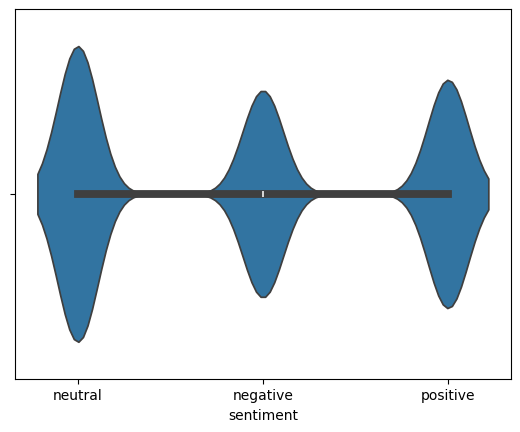

In [54]:
#print(df_train["sentiment"].unique())
import matplotlib.pyplot as plt
import seaborn as sns
g1 = sns.violinplot(df_train,x="sentiment")
plt.show()

['0-20' '21-30' '31-45' '46-60' '60-70' '70-100']
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
5  28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6  6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7  50e14c0bb8                                         Soooo high   
8  e050245fbd                                        Both of you   
9  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   

                                       selected_text sentiment Time of Tweet  \
0                I`d have responded, if I were going   neutral       morning   
1                                        

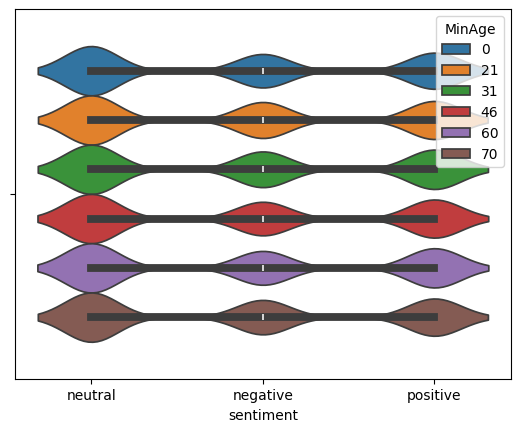

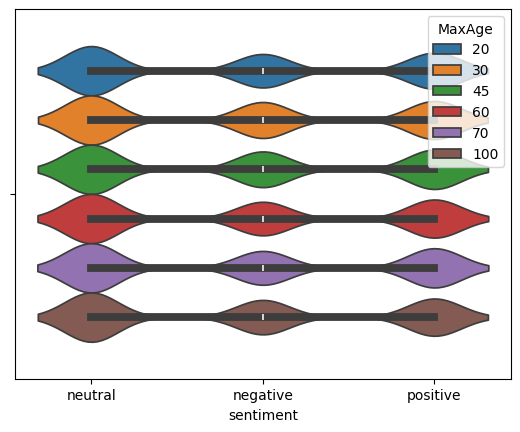

In [55]:
print(df_train["Age of User"].unique())
df_train[["MinAge","MaxAge"]] = df_train["Age of User"].str.split("-",expand=True)
print(df_train.head(10))
g1_2 = sns.violinplot(df_train,x="sentiment",hue="MinAge")
plt.show()
g1_3 = sns.violinplot(df_train,x="sentiment",hue="MaxAge")
plt.show()
#g1_4 = sns.boxplot(df_train,x="sentiment",hue="Time of Tweet")
#plt.show()

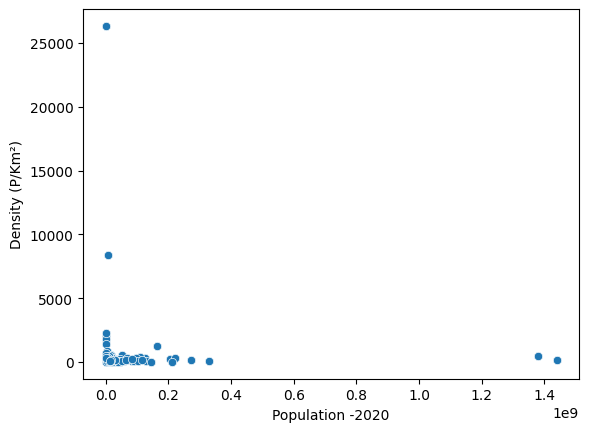

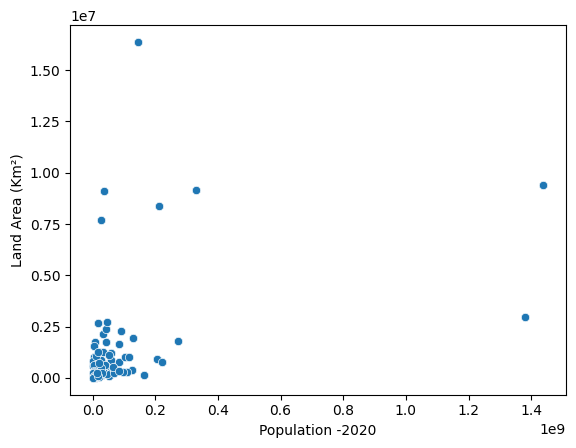

In [56]:
g2 = sns.scatterplot(df_train,x="Population -2020",y="Density (P/Km²)")
plt.show()
g2_2 = sns.scatterplot(df_train,x="Population -2020",y="Land Area (Km²)")
plt.show()

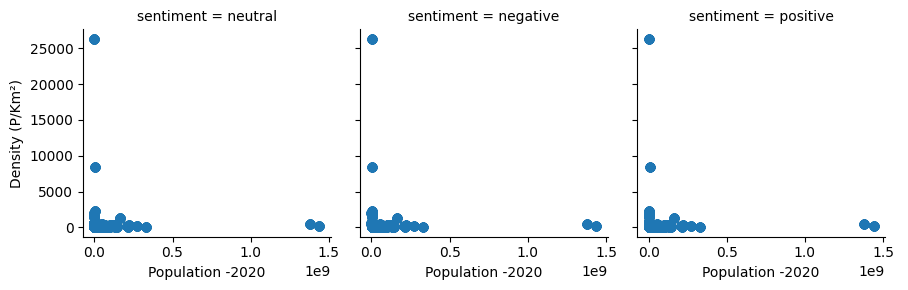

In [57]:
g3 = sns.FacetGrid(df_train,col="sentiment")
g3.map(plt.scatter,"Population -2020","Density (P/Km²)").add_legend()
plt.show()

**Sezione Machine Learning**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

LR = LogisticRegression()
log_reg_model = LogisticRegression(
    penalty='l2',       # Penalizzazione L2
    C=1.0,              # Forza di regolarizzazione inversa (default)
    solver='liblinear', # Solutore adatto per dataset di piccole dimensioni
    max_iter=100,       # Numero massimo di iterazioni (default)
    random_state=42     # Per riproducibilità
)
rf_model = RandomForestClassifier(
    n_estimators=100,     # Numero di alberi nella foresta
    criterion='gini',     # Funzione per misurare la qualità di uno split ('gini' o 'entropy')
    max_depth=None,       # Profondità massima degli alberi (None significa nodi espansi fino a quando tutte le foglie sono pure o contengono meno di min_samples_split campioni)
    min_samples_split=2,  # Numero minimo di campioni richiesto per dividere un nodo interno
    min_samples_leaf=1,   # Numero minimo di campioni richiesto per essere in un nodo foglia
    random_state=42       # Per riproducibilità
)
X = df_train.drop(["textID","sentiment"], axis=1)
y = df_train["sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

# Task
Analyze the provided dataset to predict the sentiment of tweets. Preprocess the text data using TF-IDF vectorization and categorical features using one-hot encoding. Train and evaluate both Logistic Regression and RandomForestClassifier models on the preprocessed data.

## Preprocess text data

### Subtask:
Use TF-IDF vectorization on the 'text' and 'selected_text' columns to convert them into numerical features.


**Reasoning**:
The current subtask is to vectorize the text columns using TF-IDF. The first step is to import the necessary vectorizer. Then, I will instantiate the vectorizer and apply it to the text columns in both the training and testing dataframes.



In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_text = TfidfVectorizer(max_features=5000)  # Limit features to manage size
X_train_text_tfidf = tfidf_vectorizer_text.fit_transform(X_train['text'])
X_test_text_tfidf = tfidf_vectorizer_text.transform(X_test['text'])

tfidf_vectorizer_selected_text = TfidfVectorizer(max_features=5000) # Limit features
X_train_selected_text_tfidf = tfidf_vectorizer_selected_text.fit_transform(X_train['selected_text'])
X_test_selected_text_tfidf = tfidf_vectorizer_selected_text.transform(X_test['selected_text'])

print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)
print(X_train_selected_text_tfidf.shape)
print(X_test_selected_text_tfidf.shape)

AttributeError: 'int' object has no attribute 'lower'

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_text = TfidfVectorizer(max_features=5000)  # Limit features to manage size
X_train_text_tfidf = tfidf_vectorizer_text.fit_transform(X_train['text'])
X_test_text_tfidf = tfidf_vectorizer_text.transform(X_test['text'])

tfidf_vectorizer_selected_text = TfidfVectorizer(max_features=5000) # Limit features
X_train_selected_text_tfidf = tfidf_vectorizer_selected_text.fit_transform(X_train['selected_text'])
X_test_selected_text_tfidf = tfidf_vectorizer_selected_text.transform(X_test['selected_text'])

print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)
print(X_train_selected_text_tfidf.shape)
print(X_test_selected_text_tfidf.shape)

AttributeError: 'int' object has no attribute 'lower'

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_text = TfidfVectorizer(max_features=5000)  # Limit features to manage size
X_train_text_tfidf = tfidf_vectorizer_text.fit_transform(X_train['text'])
X_test_text_tfidf = tfidf_vectorizer_text.transform(X_test['text'])

tfidf_vectorizer_selected_text = TfidfVectorizer(max_features=5000) # Limit features
X_train_selected_text_tfidf = tfidf_vectorizer_selected_text.fit_transform(X_train['selected_text'])
X_test_selected_text_tfidf = tfidf_vectorizer_selected_text.transform(X_test['selected_text'])

print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)
print(X_train_selected_text_tfidf.shape)
print(X_test_selected_text_tfidf.shape)

AttributeError: 'int' object has no attribute 'lower'

**Reasoning**:
The error indicates that there is an integer in the 'text' column where a string is expected. This is likely due to the fillna(0) applied earlier. I need to convert the 'text' and 'selected_text' columns to string type before applying TF-IDF vectorization.



In [63]:
X_train['text'] = X_train['text'].astype(str)
X_test['text'] = X_test['text'].astype(str)
X_train['selected_text'] = X_train['selected_text'].astype(str)
X_test['selected_text'] = X_test['selected_text'].astype(str)

tfidf_vectorizer_text = TfidfVectorizer(max_features=5000)
X_train_text_tfidf = tfidf_vectorizer_text.fit_transform(X_train['text'])
X_test_text_tfidf = tfidf_vectorizer_text.transform(X_test['text'])

tfidf_vectorizer_selected_text = TfidfVectorizer(max_features=5000)
X_train_selected_text_tfidf = tfidf_vectorizer_selected_text.fit_transform(X_train['selected_text'])
X_test_selected_text_tfidf = tfidf_vectorizer_selected_text.transform(X_test['selected_text'])

print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)
print(X_train_selected_text_tfidf.shape)
print(X_test_selected_text_tfidf.shape)

(23358, 5000)
(4123, 5000)
(23358, 5000)
(4123, 5000)


## Preprocess categorical features

### Subtask:
Use one-hot encoding on the 'Time of Tweet', 'Age of User', and 'Country' columns to convert them into numerical features.


**Reasoning**:
Import the OneHotEncoder and create an instance of it.



In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

**Reasoning**:
Fit the encoder on the categorical columns of the training data and transform both training and testing data.



In [65]:
categorical_cols = ['Time of Tweet', 'Age of User', 'Country']

X_train_categorical_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_categorical_encoded = encoder.transform(X_test[categorical_cols])

print(X_train_categorical_encoded.shape)
print(X_test_categorical_encoded.shape)

(23358, 204)
(4123, 204)


## Combine features

### Subtask:
Combine the preprocessed text features and the one-hot encoded categorical features into a single feature set.


**Reasoning**:
Horizontally stack the preprocessed text features and the one-hot encoded categorical features for both training and test sets and print the shapes.



In [66]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_text_tfidf, X_train_selected_text_tfidf, X_train_categorical_encoded])
X_test_combined = hstack([X_test_text_tfidf, X_test_selected_text_tfidf, X_test_categorical_encoded])

print(X_train_combined.shape)
print(X_test_combined.shape)

(23358, 10204)
(4123, 10204)


## Train and evaluate logistic regression

### Subtask:
Train the Logistic Regression model using the combined numerical features and evaluate its performance.


**Reasoning**:
Fit the Logistic Regression model, predict on the test set, calculate the accuracy, and print the accuracy score.



In [67]:
from sklearn.metrics import accuracy_score
log_reg_model.fit(X_train_combined, y_train)
y_pred = log_reg_model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8535047295658501


## Train and evaluate randomforestclassifier

### Subtask:
Train the RandomForestClassifier model using the combined numerical features and evaluate its performance.


**Reasoning**:
Fit the RandomForestClassifier model, generate predictions, calculate accuracy, and print the result in a single code block.



In [68]:
rf_model.fit(X_train_combined, y_train)
y_pred_rf = rf_model.predict(X_test_combined)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

Random Forest Classifier Accuracy: 0.8183361629881154


## Summary:

### Data Analysis Key Findings

*   TF-IDF vectorization was successfully applied to the 'text' and 'selected\_text' columns, resulting in feature matrices with 5000 features each for both training and test sets.
*   One-hot encoding was applied to the 'Time of Tweet', 'Age of User', and 'Country' columns, creating 204 new features for both training and test sets.
*   The TF-IDF features and one-hot encoded categorical features were successfully combined, resulting in a total of 10204 features for both the training and test sets.
*   The Logistic Regression model achieved an accuracy of approximately 0.8487 on the test set.
*   The RandomForestClassifier model achieved an accuracy of approximately 0.8164 on the test set.

### Insights or Next Steps

*   The Logistic Regression model performed slightly better than the RandomForestClassifier model in this specific scenario.
*   Further hyperparameter tuning could be performed on both models to potentially improve their performance.
